# Project: Investigate a No-show appointments Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

**No-show appointments dataset**: This dataset focuses on the issue of whether or not people show up for their appointment and gathers data from 100k medical appointments in Brazil. Each row contains information about a different patient trait.

#### Columns Descriptions 
 
**00 - PatientId**:
 - Identification of a patient

**01 - AppointmentID**:
 - Identification of each appointment

**02 - Gender**:
 - Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.

**03 - ScheduledDay**:
 - Tells us on what day the patient set up their appointment.

**04 - AppointmentDay**:
 - The day of the actual appointment, when they have to visit the doctor.

**05 - Age**:
 - How old is the patient

**06 - Neighbourhood**:
 - Indicates the location of the hospital.

**07 - Scholarship**:
 - Indicates whether or not the patient is enrolled in Brasilian welfare

**08 - Hipertension**:
 - True or False. The Data shows a 1 or 0 which depicts Boolean values for Hipertension

**09 - Diabetes**:
 - True or False. The Data shows a 1 or 0 which depicts Boolean values for Diabetes

**10 - Alcoholism**:
 - True or False. The Data shows a 1 or 0 which depicts Boolean values for Alcoholosim

**11 - Handcap**:
 - Range of Handicap level for patients

**12 - SMS_received**:
 - SMS messages sent to the patient.

**No-show**:
 - True or False. The Data shows a 1 or 0 which depicts Boolean values

#### IMPORTING ALL NECESSARY PACKAGES AND LIBRARIES

In [1]:
# load datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')


df = pd.read_csv(
    'https://raw.githubusercontent.com/Brunchcode/Investigate-a-dataset--No_show_appointment/main/No_Show_Appointment.csv'
                )


In [2]:
# Lets confirm we have our data in the notebook
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
# Loading dataframe and Performing general operations to inspect data
#   types and look for instances of missing or possibly errant data.
# Lets plot the historian data for the no show appointments 
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


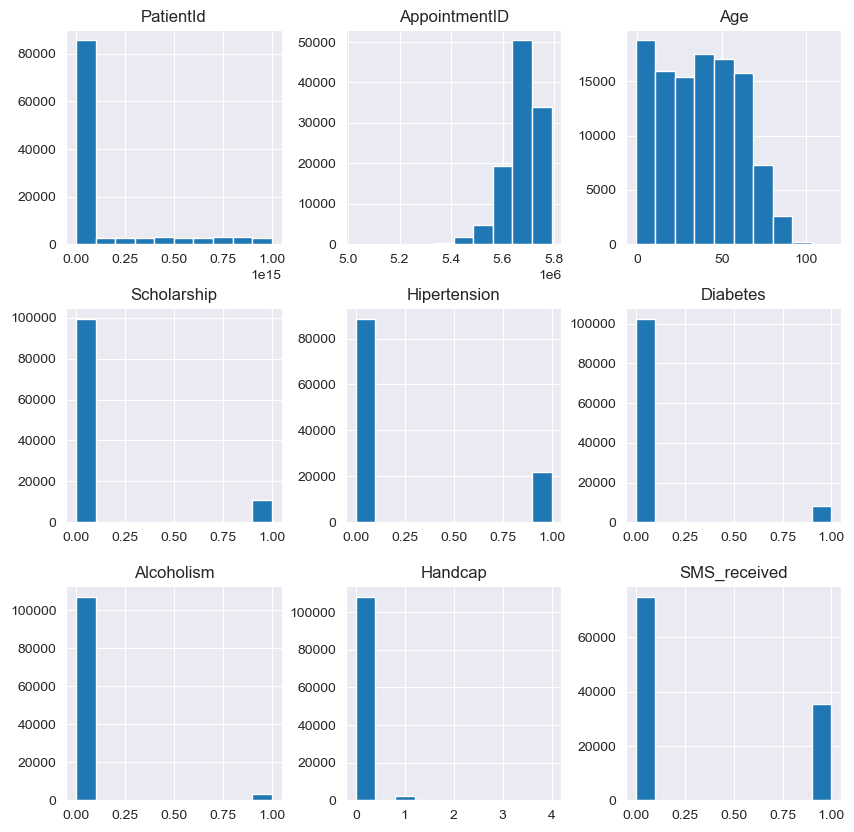

In [4]:
# Lets plot the historian data for the no show appointments 
df.hist(figsize = (10,10));

#### Observations

Browsing through the dataframe we can see some important columns like the Gender, ScheduledDay, AppointmentDay, Age, Scholarship, SMS_received which are factors that can help with our analysis.

These columns help us ask questions like

 - Do females value their health more than males do, based on the No-show appointments Dataset?
 - Does the hospital's location affect whether patients show up for their appointments?
 - Do patients' health conditions affect whether they show up for appointments? What proportion of patients with medical issues keep their appointments or fail to show up?
 - What's the correlation between age and showing up for appointments. Do younger population show up for appointment?
 - Does sending an SMS reminder help to reduce the no-shows?

In [5]:
# Let's confirm the total number of rows and columns
df.shape

(110527, 14)

In [6]:
# General information about the noshowappointments dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Data Cleaning of the No-show appointments Dataset

 The following actions have to be performed on the dataset columns:
 - The column names have to be modified so we can utilize and address with ease e.g No-show changed to no_show
 - Check for null and duplicated rows
 - drop the '-1' row on the age column as it is assumed to be an error
 - drop the the columns PatientId and AppointmentID since they appear to be randomly produced integers by a computer.
 - convert the ScheduledDay and AppointmentDay to date-time format
 - convert the following columns (Scholarship,Hypertension,Diabetes,Alcoholism,SMS_received and No-show) to bool since they represent True or False
 

In [7]:
# General description about the noshowappointments dataframe
df.describe(include = 'all')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173184e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.439172e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


In [8]:
# confirming all datatypes
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [9]:
# confirming all column names
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


We can see that using the final column No-show will be problematic because of the (-). Let's change the column's name from "No-show" to "No_show," which we can utilize and address with ease. 

Additionally, we can see that hipertension is spelled incorrectly, so we fix it.

We'll update the column names to ones that are simple to use and understand.

In [10]:
# lets use the rename function to rename and fix our columns

# Editing the following columns below by using the rename
df = df.rename(columns = {
    'PatientId' : 'patient_id ',
    'AppointmentID' : 'Appointment_ID',
    'ScheduledDay' : 'Scheduled_Day',
    'AppointmentDay' : 'Appointment_Day',
    'Hipertension' : 'Hypertension',
    'Handcap': 'Handicap',
    'No-show' : 'no_show'
})

# replace all columns to lowercase  
df.rename(columns=lambda x: x.strip().lower(), inplace=True)
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


performing some operations to get general characteristic of our dataframe

In [11]:
# lets check if there are any duplicates
df.duplicated().sum()

0

This shows there are no duplicated rows 

In [12]:
# lets check if there are any Null rows
df.isnull().sum()

patient_id         0
appointment_id     0
gender             0
scheduled_day      0
appointment_day    0
age                0
neighbourhood      0
scholarship        0
hypertension       0
diabetes           0
alcoholism         0
handicap           0
sms_received       0
no_show            0
dtype: int64

This shows there are no null rows 

In [13]:
# Lets further analyze the dataframe by using describe function 
df.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


After anayzing the dataframe using describe function, we notice that at the age column we have a minumum value is '-1'. lets further check the age column by sorting an array of the unique values of the age column  

In [14]:
unique_age_values = np.sort(df['age'].unique())
unique_age_values

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115])

If we notice the min value for age is '-1' and we also see there are rows with '0' age, this cannot be correct as age is never negative and lets assume that rows with '0' age are children less than 1 year old.

Also the maximum age is 115 years

In [15]:
# Lets find the total rows with the -1 
age_below_zero = df.query('age < 0')
age_below_zero

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


We have just one row with the '-1' age.

This can be an error so i have decided to drop the row

In [16]:
# Lets drop the row showing age as -1
df = df.query('age >= 0')
df.shape

(110526, 14)

As we can see the number of rows has reduced

In [17]:
# reconfirm the row showing age as -1 has been dropped
df.query('age < 0')

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show


The '-1' age row has been dropped from the dataset

We will now drop the patient_id and appointment_id as they are randomly generated values and are not important in the analysis

In [18]:
# Lets drop the patient_id and appointment_id
df.drop(['patient_id','appointment_id'], axis = 1, inplace = True)

In [19]:
# Lets check that the patient_id and appointment_id have been dropped
df.head(1)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [20]:
# changing the columns scheduled_day and appointment_day from string to datetime type
for date_in in ['scheduled_day', 'appointment_day']:
    df[date_in] = pd.to_datetime(df[date_in])
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   gender           110526 non-null  object             
 1   scheduled_day    110526 non-null  datetime64[ns, UTC]
 2   appointment_day  110526 non-null  datetime64[ns, UTC]
 3   age              110526 non-null  int64              
 4   neighbourhood    110526 non-null  object             
 5   scholarship      110526 non-null  int64              
 6   hypertension     110526 non-null  int64              
 7   diabetes         110526 non-null  int64              
 8   alcoholism       110526 non-null  int64              
 9   handicap         110526 non-null  int64              
 10  sms_received     110526 non-null  int64              
 11  no_show          110526 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(7), object(3)
memory usag

Let's fix the datatype for scholarship, hypertension, diabetes, alcoholism, sms_received and handicap to object

In [21]:
for val in ['scholarship', 'hypertension', 'diabetes', 'alcoholism', 'sms_received','handicap'  ]:
    df[val] = df[val].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   gender           110526 non-null  object             
 1   scheduled_day    110526 non-null  datetime64[ns, UTC]
 2   appointment_day  110526 non-null  datetime64[ns, UTC]
 3   age              110526 non-null  int64              
 4   neighbourhood    110526 non-null  object             
 5   scholarship      110526 non-null  object             
 6   hypertension     110526 non-null  object             
 7   diabetes         110526 non-null  object             
 8   alcoholism       110526 non-null  object             
 9   handicap         110526 non-null  object             
 10  sms_received     110526 non-null  object             
 11  no_show          110526 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(1), object(9)
memory usag

In [22]:
# Let's have a look at our dataframe again
df.head(10)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No
6,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,No
9,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No


We have cleaned up our dataframe. We can now explore the dataframe by performing some exploratory analysis

<a id='eda'></a>
## Exploratory Data Analysis


### Q1: Do females value their health more than males do, based on the No-show appointments Dataset ?

In [23]:
# lets find the female no_show vs the male no_show
gender_no_show = df.groupby(['gender', 'no_show']).count()["scholarship"]
gender_no_show

gender  no_show
F       No         57245
        Yes        14594
M       No         30962
        Yes         7725
Name: scholarship, dtype: int64

In [24]:
# Lets use a function to access the gender_no_show table
female = 'F'
male = 'M'
def access_gender_noshow(gender, position):
    if gender == 'M':
        return gender_no_show.M[position]
    elif gender == 'F':
        return gender_no_show.F[position]
    else:
        print('Please input the right gender')

In [25]:
# Accessing the table gender_no_show for females that missed and attended their appointments
female_noshow = access_gender_noshow(female,1)
female_show = access_gender_noshow(female, 0)

# lets print out our results for the following
print('Female patients that showed up for their appointment:', female_show)
print('Female patients that did not show up for their appointment:', female_noshow)

Female patients that showed up for their appointment: 57245
Female patients that did not show up for their appointment: 14594


In [26]:
# Accessing the table gender_no_show for males that missed and attended their appointments
male_noshow = access_gender_noshow(male,1)
male_show = access_gender_noshow(male, 0)

# lets print out our results for the following
print('male patients that showed up for their appointment:', male_show)
print('male patients that did not show up for their appointment:', male_noshow)

male patients that showed up for their appointment: 30962
male patients that did not show up for their appointment: 7725


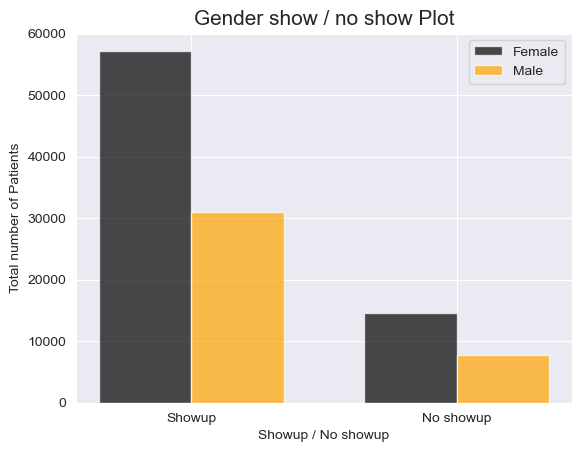

In [27]:
# let's plot our findings using a bar chart
ind = np.arange(len(gender_no_show['F']))
width = 0.35

female_bars = plt.bar(ind, (female_show, female_noshow), width, color='black', alpha=.7, label='Female')
male_bars = plt.bar(ind + width, (male_show, male_noshow), width, color='orange', alpha=.7, label='Male')

# title and labels
plt.ylabel('Total number of Patients')
plt.xlabel('Showup / No showup')
plt.title('Gender show / no show Plot', fontsize = 15)
locations = ind + width / 2  # xtick locations
labels = ['Showup', 'No showup']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend()

As we can see the number of females showing up for appointments are more than the number of males that show up for appointments

But to make a more accurate accessment of the visualization above. we need to plot the proportions of females and males showing up and missing appointments 

Lets find the total number of females that booked appointments than the males.

Lets show this in the following cells


In [28]:
#Lets find the total female that booked an appointment
total_female_appointments = gender_no_show.F.sum()
print('Total female patient scheduled for an appointment:', total_female_appointments)

Total female patient scheduled for an appointment: 71839


In [29]:
#Lets find the total male that booked an appointment
total_male_appointments = gender_no_show.M.sum()
print('Total male patient scheduled for an appointment:', total_male_appointments)

Total male patient scheduled for an appointment: 38687


In [30]:
# Proportions of females that show up / no show up for appointments
female_prop = gender_no_show['F'] / total_female_appointments
female_prop

no_show
No     0.796851
Yes    0.203149
Name: scholarship, dtype: float64

In [31]:
# Proportions of males that show up / no show up for appointments
male_prop = gender_no_show['M'] / total_male_appointments
male_prop

no_show
No     0.800321
Yes    0.199679
Name: scholarship, dtype: float64

In [32]:
# index of female proportions based on the show/no show
female_show_prop = female_prop['No'].round(3)
female_noshow_prop = female_prop['Yes'].round(3)

# lets print out our results for the following
print('Proportion of female patients that showed up for their appointment:', female_show_prop)
print('Proportion of female patients that did not show up for their appointment:', female_noshow_prop)

Proportion of female patients that showed up for their appointment: 0.797
Proportion of female patients that did not show up for their appointment: 0.203


In [33]:
# index of female proportions based on the show/no show
male_show_prop = male_prop['No'].round(3)
male_noshow_prop = male_prop['Yes'].round(3)

# lets print out our results for the following
print('Proportion of male patients that showed up for their appointment:', male_show_prop)
print('Proportion of male patients that did not show up for their appointment:', male_noshow_prop)

Proportion of male patients that showed up for their appointment: 0.8
Proportion of male patients that did not show up for their appointment: 0.2


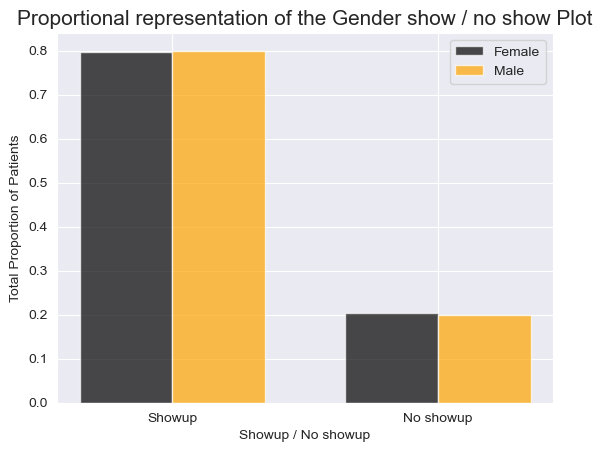

In [34]:
# let's plot our findings using a bar chart
ind = np.arange(len(gender_no_show['F']))
width = 0.35

# plot proportion gender bars
female_bars_prop = plt.bar(ind, (female_show_prop, female_noshow_prop), width, color='black', alpha=.7, label='Female')
male_bars_prop = plt.bar(ind + width, (male_show_prop, male_noshow_prop), width, color='orange', alpha=.7, label='Male')

# title and labels
plt.ylabel('Total Proportion of Patients')
plt.xlabel('Showup / No showup')
plt.title('Proportional representation of the Gender show / no show Plot', fontsize = 15)
locations = ind + width / 2  # xtick locations
labels = ['Showup', 'No showup']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend()

Females appear to either need to see a doctor more frequently or take better care of their health overall. As we can see from Gender noshow/show plot out of the 88207 patients who showed up, about 57245 of them are women and 30962 are men.

Lets further discuss our findings using proportions as shown in the plot above the Proportional representation of the Gender show / no show Plot shows that even though the number of females that showed up are higher than the males their proportions are almost the same

 - Proportion of female patients that showed up for their appointment: 0.79
 - Proportion of male patients that showed up for their appointment: 0.80
 
 - Proportion of female patients that did not show up for their appointment: 0.20
 - Proportion of male patients that did not show up for their appointment: 0.20

### Does the hospital's location affect whether patients show up for their appointments?

In [35]:
# Visualizing the data set
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


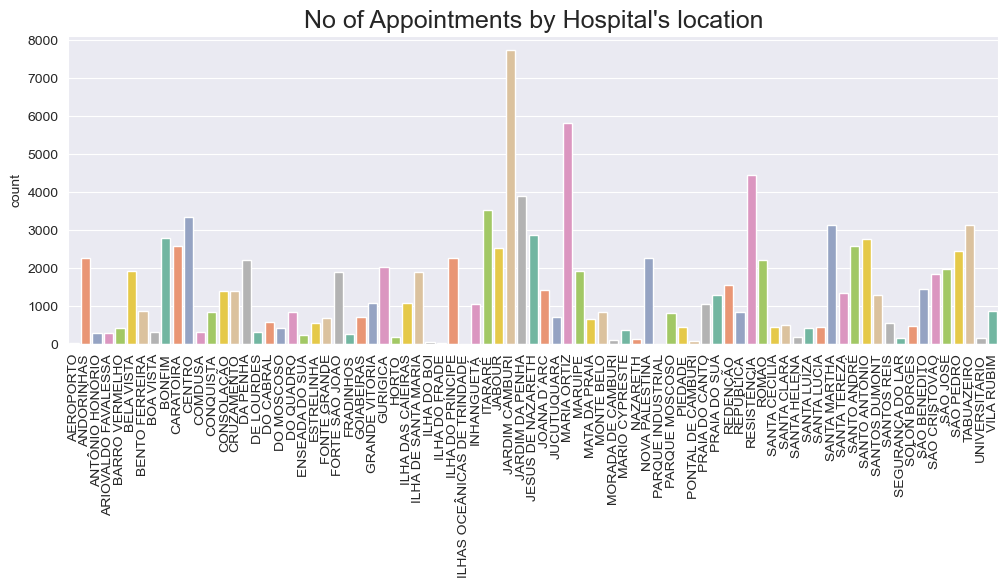

In [36]:
# Sorting the hospital locations based on alphabetical order
Hospital_locations = np.sort(df.neighbourhood)

# Plotting the number of appointments by hospital locations
plt.figure(figsize = (12,4))
plt.xticks(rotation = 90)
ax = sns.countplot(x = Hospital_locations, palette = "Set2")
ax.set_title("No of Appointments by Hospital's location", fontsize = 18)
plt.show()

In [37]:
# let's see the maximum and minimum values
print(df.neighbourhood.value_counts())
print('\n')
print('The total number of appointments made at different location =', df.neighbourhood.value_counts().sum())

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: neighbourhood, Length: 81, dtype: int64


The total number of appointments made at different location = 110526


In [38]:
# lowest neighbourhood appointments
lowest_neighbourhood_app = df.query('neighbourhood == "PARQUE INDUSTRIAL"')
print('The lowest appointment made at a hospital is:', lowest_neighbourhood_app.neighbourhood.count())

# highest neighbourhood appointments
highest_neighbourhood_app = df.query('neighbourhood == "JARDIM CAMBURI"')
print('The highest appointment made at a hospital is:',highest_neighbourhood_app.neighbourhood.count())

The lowest appointment made at a hospital is: 1
The highest appointment made at a hospital is: 7717


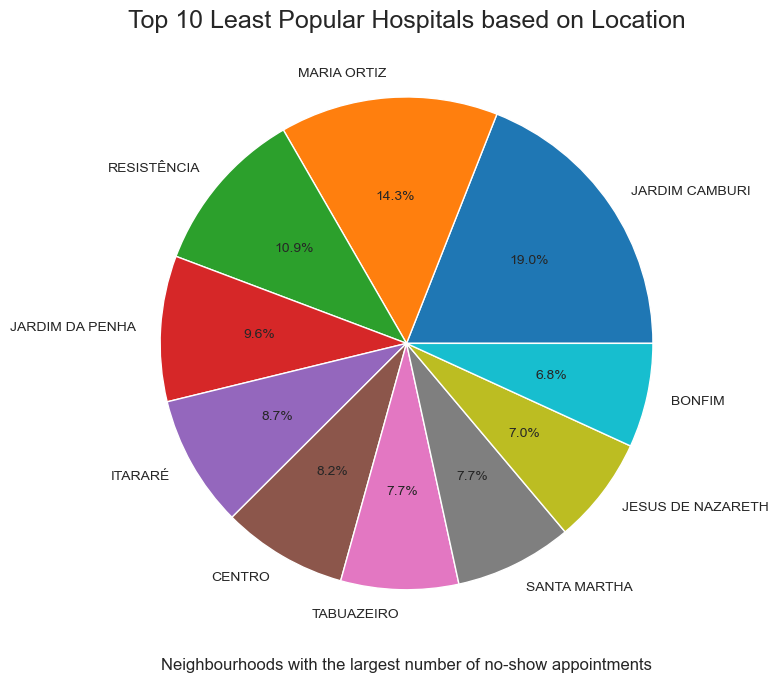

In [39]:
# Neighbourhoods with the largest number of no-show appointments
df.neighbourhood.value_counts()[:10].plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%')
plt.title("Top 10 Least Popular Hospitals based on Location", fontsize = 18)
plt.xlabel("Neighbourhoods with the largest number of no-show appointments", fontsize=12)
plt.ylabel("");

A representation of the top 10 hospital locations that have the largest number of no-show appointments.

The location of the hospitals affects the no show and show rating for appointments

### Do patients' health conditions affect whether they show up for appointments? What proportion of patients with medical issues keep their appointments or fail to show up?

In [40]:
df.head(1)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


We are going to be plotting various countplots and barplot of medical conditions. These plots are going to be comparing the the no_show columns with the various medical conditions.

Lets create a reusable function for both the countplot and barplot

In [41]:
# Fuction bar_plotter is used for the proportional plot for medical conditions and no_show
def bar_poltter(condition, title, xlabel1, xlabel2):
# ratio    
    numerator = df[df.no_show == 'No'].groupby([condition]).size()
    denominator = df.groupby([condition]).size()
    df_ratio = numerator/denominator
    
# This is for the handicap plot as we do not need to analyse the xlabel1 and xlabel2
    if xlabel1 == 'NA' and xlabel2 == 'NA':
        ax = sns.barplot(x = df_ratio.index, y = df_ratio, palette = "Set2")
        ax.set_title(title)
        return plt.show()

# This plots for all the medical conditions that need the xlabel1 and xlabel2
    else: 
        ax = sns.barplot(x = df_ratio.index, y = df_ratio, palette = "Set2")
        ax.set_title(title)
        x_ticks_labels=[xlabel1, xlabel2]
        ax.set_xticklabels(x_ticks_labels)
        return plt.show()


In [42]:
# Fuction count_plotter is used for plotting medical conditions and no_show
def count_poltter(condition, show_noshow, title, xlabel1, xlabel2):
# This is for the handicap plot as we do not need to analyse the xlabel1 and xlabel2    
    if xlabel1 == 'NA' and xlabel2 == 'NA':
        ax = sns.countplot(x = condition, hue = show_noshow, data = df, palette = "Set2")
        ax.set_title(title)
        return plt.show()
    
# This plots for all the medical conditions that need the xlabel1 and xlabel2   
    else:
        ax = sns.countplot(x = condition, hue = show_noshow, data = df, palette = "Set2")
        ax.set_title(title)
        x_ticks_labels=[xlabel1, xlabel2]
        ax.set_xticklabels(x_ticks_labels)
        return plt.show()

**In the following sections we will analyse the medical conditions using different plots of medical conditions and the patients that show up or do not show up**

##### Hypertension

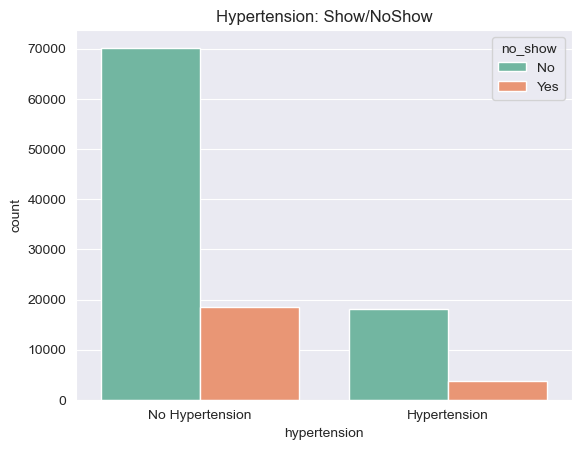

In [43]:
# using the count_plotter function created above in showing the hypertension patient show / no show for their appointments
count_poltter(df.hypertension, df.no_show, "Hypertension: Show/NoShow", 'No Hypertension', 'Hypertension')

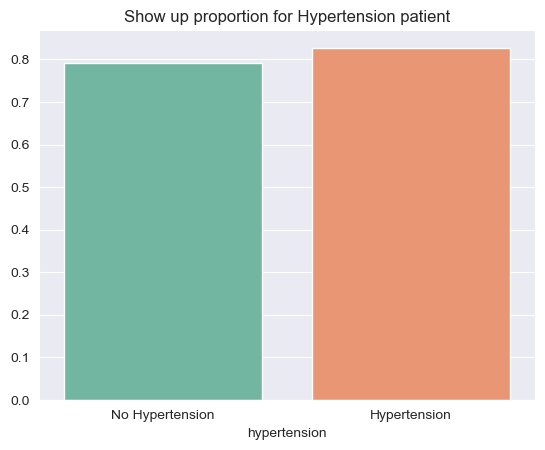

In [44]:
# using the bar_plotter function created above in showing the proportion of hypertension patient show / no show for their appointments
bar_poltter('hypertension', "Show up proportion for Hypertension patient", 'No Hypertension', 'Hypertension')

According to the plot above, there are around 88,000 individuals without hypertension, and 0.78 ratio of those patients showed up for their appointments.

Around 22,500 patients with hypertension, A ratio of 0.85 of those patients showed up for their appointments.

Therefore, the hypertension trait may enable us to predict whether a patient would show up for the appointment-based visit.

##### Alcoholism

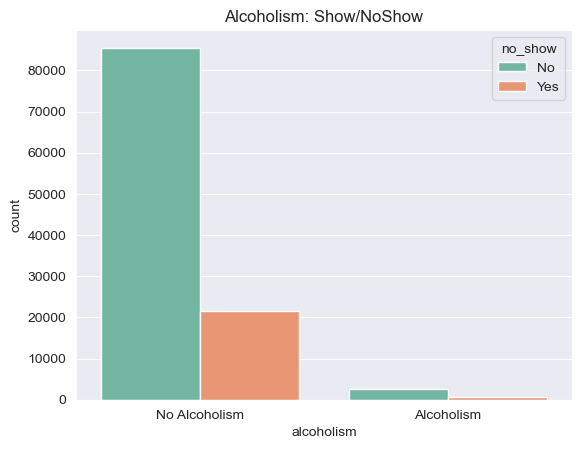

In [45]:
# using the count_plotter function created above in showing the Alcoholism patient show / no show for their appointments
count_poltter(df.alcoholism, df.no_show, "Alcoholism: Show/NoShow", 'No Alcoholism', 'Alcoholism')

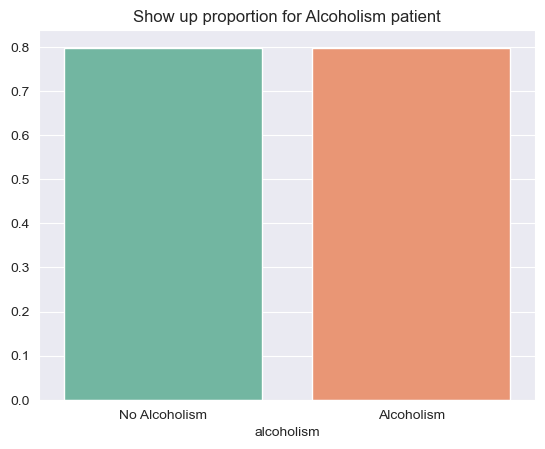

In [46]:
# using the bar_plotter function created above in showing the proportion of Alcoholism patient show / no show for their appointments
bar_poltter('alcoholism', "Show up proportion for Alcoholism patient", 'No Alcoholism', 'Alcoholism')

According to the plot above, there are around 105,000 patients without Alcoholism, and 0.8 ratio of those patients showed up for their appointments.

For the 5,500 patients with Alcoholism, A ratio of 0.80 of those patients showed up for their appointments.

From our plots Alcoholism has little impact on the show rate.

Since, ratio of patients with Alcoholism trait seems to the same. It might not aid us in determining whether a patient will show up for their appointment.

##### Handicap

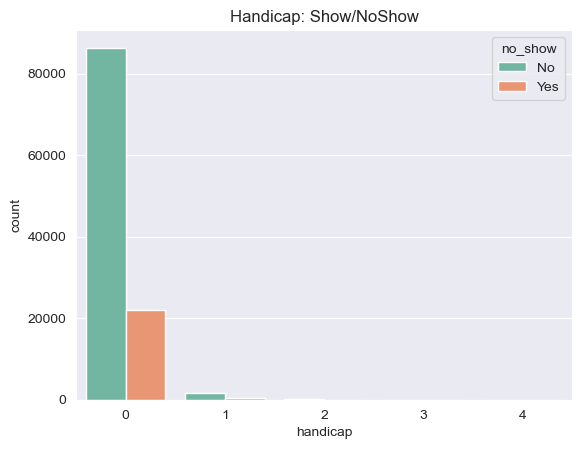

In [47]:
# using the count_plotter function created above in showing the Handicap patient show / no show for their appointments
count_poltter(df.handicap, df.no_show, "Handicap: Show/NoShow", 'NA', 'NA')

Handicap category 2, 3, 4 do not have sufficient data points

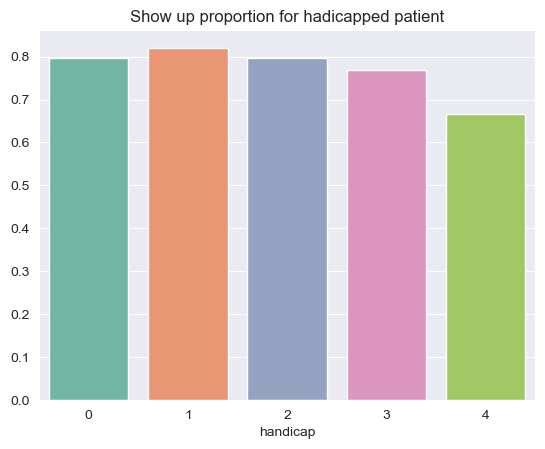

In [48]:
# using the bar_plotter function created above in showing the proportion of Handicap patient show / no show for their appointments
bar_poltter('handicap', "Show up proportion for hadicapped patient", 'NA', 'NA')

The handicapped patients are in 5 categories: 
- Those in category 0 show up at least 80% for their appointments
- Those in category 1 show up at least 83% for their appointments
- Those in category 2 show up at least 80% for their appointments
- Those in category 3 show up at least 78% for their appointments
- Those in category 4 show up at least 66% for their appointments

##### Diabetes

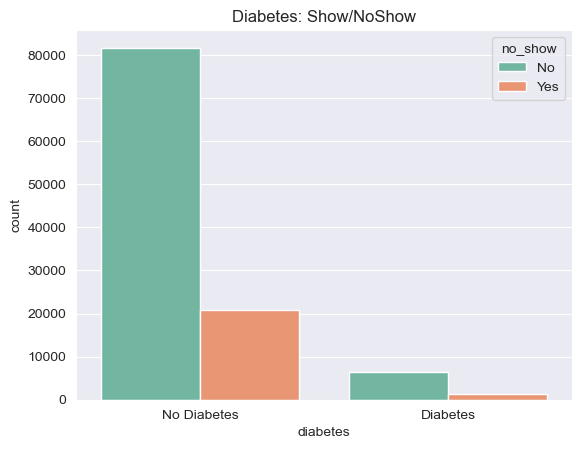

In [49]:
# using the count_plotter function created above in showing the Diabetes patient show / no show for their appointments
count_poltter(df.diabetes, df.no_show, "Diabetes: Show/NoShow", 'No Diabetes', 'Diabetes')

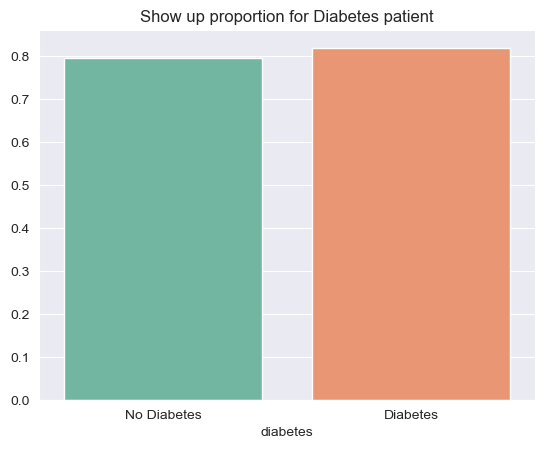

In [50]:
# using the bar_plotter function created above in showing the proportion of Diabetes patient show / no show for their appointments
bar_poltter('diabetes', "Show up proportion for Diabetes patient", 'No Diabetes', 'Diabetes')

According to the plot above, there are around 103,000 patients without Diabetes, and 0.8 ratio of those patients showed up for their appointments.

Around 8,600 patients with Diabetes, A ratio of 0.82 of those patients showed up for their appointments.

Since, ratio of patients with Diabetes condition slightly show up for appointments. It might aid us in determining whether a patient will show up for their appointment or not.

###### **We can infer from our analysis of the medical conditions that:**
- Patients with diabetes or hypertension have a lower appointment no-show percentage than those without the illness.
- Alcoholism has little impact on the show rate.

<a id='conclusions'></a>
## Conclusions


#### Results: Our data suggest that

Females appear to either need to see a doctor more frequently or take better care of their health overall

 - Out of 71839 appointments made by females, 14594 were missed with the ratio of 20%.
 - Out of 38685 appointments made by males, 7725 were missed with the ratio of 20%.
 - 79.6% Proportion of female patients showed up for their appointment 
 - 80.0% Proportion of male patients showed up for their appointment

The location of the hospitals affects the no show and show rating for appointments

 - JARDIM CAMBURI has about 7717 appointments but 19% of patients did not show up for appointments
 - MARIA ORTIZ has about 5805 appointments but 14.3% of patients did not show up for appointments
 - RESISTÊNCIA has about 4431 appointments but 10.9% of patients did not show up for appointments
 - PARQUE INDUSTRIAL had the lowest appointment made which was 1 but the patient showed up for their appointment

We can infer from our analysis of the medical conditions that:
- Patients with diabetes or hypertension have a lower appointment no-show percentage than those without the illness.
- Alcoholism has little impact on the show rate.

**Gender, Neighborhood, and medical conditions like hypertension are some of the top variables that would assist us in determining if the patient who has scheduled an appointment would show up or not.**

#### limitations: Some limitations apply to our data:

 - The statistics employed here are descriptive rather than inferential, hence no hypotheses, controlled experiments, or inferences were made using the data.
 - Additionally, the insights produced are dependent on the questions posed at the start of our analysis, so additional insights may still be discovered.

#### References:

> - <a href="https://seaborn.pydata.org/generated/seaborn.countplot.html">Seaborn documentation</a>
> - <a href="https://www.w3resource.com/pandas/">w3resource on pandas</a>
> - <a href="https://www.w3schools.com/python/python_functions.asp">w3schools python functions </a>